# Gaussian

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
#%matplotlib widget

# 1D Gaussian

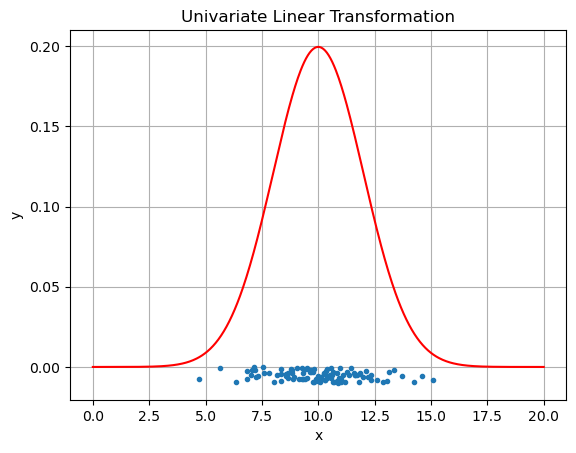

In [5]:
plt.figure()
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.title("Univariate Linear Transformation")

x = np.linspace(0,20,500)
mu = 10
sigma = 2
y1 = norm.pdf(x,mu,sigma) 
plt.plot(x, y1, 'r', label=r'$X=N(\mu,\sigma^2)$')
sx = np.random.normal(mu, sigma, 100)
sy = np.random.uniform(0,-0.01,100)
plt.plot(sx,sy,'.')    

# 2D Gaussian

In [6]:
from matplotlib.patches import Ellipse
def plotCovariance(u, P, cover ,ax, color='k'):
    
    eval, evec = np.linalg.eigh(P)
    angle = np.arctan2(evec[0,1], evec[0,0])   
    v1 = 1/np.sqrt(eval[0]*(1-cover))
    v2 = 1/np.sqrt(eval[1]*(1-cover))
    ell = Ellipse(np.array([u[0], u[1]]), 2*v2, 2*v1, angle= np.rad2deg(angle))    
    ax.add_artist(ell)
    ell.set_clip_box(ax.bbox)
    ell.set_edgecolor(color)
    plt.scatter(u[0], u[1], c=color)

[[2.84080314 1.46077145]
 [1.46077145 2.15919686]]


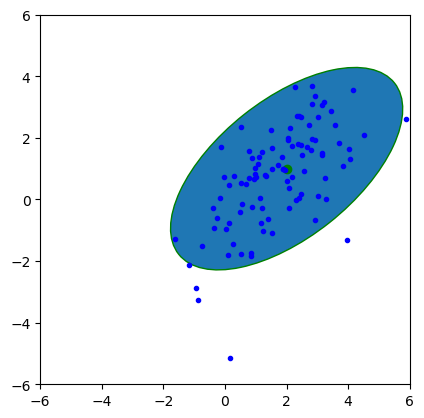

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)

sigma1 = 1
sigma2 = 4
cov_normal = np.mat([[sigma1, 0], [0, sigma2]])  
alpha = 0.9
A =  np.mat([[np.cos(alpha), np.sin(alpha)],[-np.sin(alpha), np.cos(alpha)]]) 


mean = (2, 1)  
cov = A * cov_normal * A.transpose()
print(cov)
x, y = np.random.multivariate_normal(mean, cov, 100).T
ax.plot(x,y,'.b')    
plotCovariance(mean,cov, 0.95, ax, 'g')